# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [2]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [3]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

HTTPError: HTTP Error 403: Forbidden

**Note**: Original code provided by springboard to import the data did not work. So I used the following block of code.

In [13]:
import requests

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

try:
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }  # Mimic a Chrome browser
    response = requests.get(url_LondonHousePrices, headers=headers)
    response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
    properties = pd.read_excel(response.content, sheet_name="Average price", index_col=None)
    print(properties.head())
except requests.exceptions.HTTPError as errh:
    print(f"HTTP Error: {errh}")
except requests.exceptions.ConnectionError as errc:
    print(f"Error Connecting: {errc}")
except requests.exceptions.Timeout as errt:
    print(f"Timeout Error: {errt}")
except requests.exceptions.RequestException as err:
    print(f"OOps: Something Else {err}")

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14120\2256476928.py:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  properties = pd.read_excel(response.content, sheet_name="Average price", index_col=None)


  Unnamed: 0 City of London Barking & Dagenham     Barnet     Bexley  \
0        NaT      E09000001          E09000002  E09000003  E09000004   
1 1995-01-01          90347              51870      98948      64956   
2 1995-02-01          81213              52513      98848      64786   
3 1995-03-01          78168              52701      97848      64366   
4 1995-04-01          76172              54618      96273      64276   

       Brent    Bromley     Camden    Croydon     Ealing  ... NORTH WEST  \
0  E09000005  E09000006  E09000007  E09000008  E09000009  ...  E12000002   
1      76880      83082     119775      70118      85469  ...      40907   
2      77651      83068     118365      69908      86551  ...      40877   
3      77644      82856     119131      69666      87067  ...      41351   
4      78668      82525     118948      69562      87933  ...      41195   

  YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS EAST OF ENGLAND     LONDON  \
0          E12000003     E12000

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [14]:
print(properties.shape)
properties.head()

(361, 49)


,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,90347,51870,98948,64956,76880,83082,119775,70118,85469,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
2,1995-02-01,81213,52513,98848,64786,77651,83068,118365,69908,86551,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
3,1995-03-01,78168,52701,97848,64366,77644,82856,119131,69666,87067,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
4,1995-04-01,76172,54618,96273,64276,78668,82525,118948,69562,87933,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

To transform this DataFrame into a tidy format where each row represents a borough and each column contains time-series data for that borough, we'll first transpose the structure. This operation will:

Convert the borough names into row indices

Use the datetime objects as column headers

This transposition brings us closer to our goal of achieving a properly structured tidy dataset, where:

Rows correspond to individual boroughs

Columns represent observations at specific time points

Each cell contains a single measurement value

The transposed format serves as an intermediate step that makes subsequent data cleaning and analysis more straightforward.

In [15]:
properties_T = properties.T
properties_T

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,103215,...,892515,871986,860972,797832,745201,731341,713777,687104,680670,792499
Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,52909,...,342817,344631,344640,342051,349225,347689,350143,351439,354980,355594
Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,98936,...,604879,608108,616911,620768,625383,628771,625476,622268,624855,616916
Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,64508,...,395095,396719,395600,400090,399746,404894,407291,409074,406843,403541
Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,79557,...,555677,540262,538706,567471,570755,585713,589162,597468,593162,570649
Bromley,E09000006,83082,83068,82856,82525,82951,83806,84330,83471,82847,...,487964,482885,487550,493299,500793,503357,509924,512533,519210,517966
Camden,E09000007,119775,118365,119131,118948,118781,120721,122840,124328,119442,...,818068,803467,826566,838027,865790,861267,848106,826827,827454,830814
Croydon,E09000008,70118,69908,69666,69562,69800,70011,70102,69951,70356,...,389099,393489,389816,392980,394481,406601,409205,412832,409222,409982
Ealing,E09000009,85469,86551,87067,87933,87813,87336,88108,88487,87743,...,558278,558479,565767,576468,581855,585027,587896,578495,578993,566898


**2.3. Cleaning the data (part 2)**

You might have to **rename** a couple columns. How do you do this? The clue's pretty bold...

The row indices of our DataFrame contain the names of the boroughs. This information should be within the DataFrame itself. The indices should just be a unique ID

In [16]:
properties_T.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [17]:
# To convert the borough names from indices into a regular column, we'll:
# Call the .reset_index() method on properties_T
# Reassign the result back to properties_T

properties_T = properties_T.reset_index()
properties_T

,index,0,1,2,3,4,5,6,7,8,...,351,352,353,354,355,356,357,358,359,360
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,892515,871986,860972,797832,745201,731341,713777,687104,680670,792499
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,342817,344631,344640,342051,349225,347689,350143,351439,354980,355594
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,604879,608108,616911,620768,625383,628771,625476,622268,624855,616916
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,395095,396719,395600,400090,399746,404894,407291,409074,406843,403541
5,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,555677,540262,538706,567471,570755,585713,589162,597468,593162,570649
6,Bromley,E09000006,83082,83068,82856,82525,82951,83806,84330,83471,...,487964,482885,487550,493299,500793,503357,509924,512533,519210,517966
7,Camden,E09000007,119775,118365,119131,118948,118781,120721,122840,124328,...,818068,803467,826566,838027,865790,861267,848106,826827,827454,830814
8,Croydon,E09000008,70118,69908,69666,69562,69800,70011,70102,69951,...,389099,393489,389816,392980,394481,406601,409205,412832,409222,409982
9,Ealing,E09000009,85469,86551,87067,87933,87813,87336,88108,88487,...,558278,558479,565767,576468,581855,585027,587896,578495,578993,566898


In [18]:
# Now let's check out our DataFrames indices: 
properties_T.index

RangeIndex(start=0, stop=49, step=1)

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

**Notice that these values are all the months from January 1995 to August 2019, inclusive**. You can reassign the columns of your DataFrame the values within this row at index 0 by making use of the *.columns* feature.

In [19]:
# Try this now. 
properties_T.columns = properties_T.iloc[0]
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,892515,871986,860972,797832,745201,731341,713777,687104,680670,792499
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,342817,344631,344640,342051,349225,347689,350143,351439,354980,355594
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,604879,608108,616911,620768,625383,628771,625476,622268,624855,616916
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,395095,396719,395600,400090,399746,404894,407291,409074,406843,403541


You need to drop the row at index 0! 

A good way to do this is reassign *properties_T* with the return value of calling the DataFrame ***drop()*** method, passing 0 as the index.

In [20]:
# Have a go at this now. 
properties_T = properties_T.drop(0)
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,892515,871986,860972,797832,745201,731341,713777,687104,680670,792499
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,342817,344631,344640,342051,349225,347689,350143,351439,354980,355594
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,604879,608108,616911,620768,625383,628771,625476,622268,624855,616916
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,395095,396719,395600,400090,399746,404894,407291,409074,406843,403541
5,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,555677,540262,538706,567471,570755,585713,589162,597468,593162,570649


You can see from the .head() list call that you need to rename some columns.

'Unnamed: 0' should be something like 'London Borough' and 'NaN' should be changed.

Recall, that pandas DataFrames have a .rename() method. One of the keyworded arguments to this method is columns. You can assign it a dictionary whose keys are the current column names you want to change, and whose values are the desired new names.

Note: you can change the 'Unnamed: 0' name of the first column just by including that string as a key in our dictionary, but 'NaN' stands for Not A Number, and is denoted by pd.NaT. Do not use quotes when you include this value. NaN means Not A Number, and NaT means Not A Time - both of these values represent undefined or unrepresenable values like 0/0. They are functionally Null values. Don't worry, we'll help you with this.

Call the rename() method on properties_T and set the columns keyword equal to the following dictionary: {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'} , then reassign that value to properties_T to update the DataFrame.

In [21]:
# Try this here. 
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

In [22]:
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,892515,871986,860972,797832,745201,731341,713777,687104,680670,792499
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,342817,344631,344640,342051,349225,347689,350143,351439,354980,355594
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,604879,608108,616911,620768,625383,628771,625476,622268,624855,616916
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,395095,396719,395600,400090,399746,404894,407291,409074,406843,403541
5,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,555677,540262,538706,567471,570755,585713,589162,597468,593162,570649


### Data Transformation to Tidy Format

To properly structure our real estate data according to **tidy data principles**, we'll convert the wide-format DataFrame into a long-format using `pd.melt()`:

#### Key Transformations:
- 🔄 Convert 300+ date columns → single `time` column
- 📊 Reshape into observation-per-row format
- ✅ Preserve borough and ID identifiers

In [23]:
clean_properties = pd.melt(properties_T, id_vars= ['London_Borough', 'ID'])

In [25]:
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01 00:00:00,90347
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870
2,Barnet,E09000003,1995-01-01 00:00:00,98948
3,Bexley,E09000004,1995-01-01 00:00:00,64956
4,Brent,E09000005,1995-01-01 00:00:00,76880


In [27]:
clean_properties.value_counts("London_Borough")

London_Borough
Barking & Dagenham      360
Barnet                  360
Lambeth                 360
Lewisham                360
Merton                  360
NORTH EAST              360
NORTH WEST              360
Newham                  360
Outer London            360
Redbridge               360
Richmond upon Thames    360
SOUTH EAST              360
SOUTH WEST              360
Southwark               360
Sutton                  360
Tower Hamlets           360
Unnamed: 34             360
Unnamed: 37             360
Unnamed: 47             360
WEST MIDLANDS           360
Waltham Forest          360
Wandsworth              360
Westminster             360
LONDON                  360
Kingston upon Thames    360
Kensington & Chelsea    360
Enfield                 360
Bexley                  360
Brent                   360
Bromley                 360
Camden                  360
City of London          360
Croydon                 360
EAST MIDLANDS           360
EAST OF ENGLAND         360
Ealin

In [28]:
clean_properties.shape

(17280, 4)

Rename the '0' column 'Month', and the 'value' column 'Average_price'. 

Use the ***rename()*** method, and reassign *clean_properties* with the result. 

In [90]:
# Re-name the column names
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})
clean_properties

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0
...,...,...,...,...
17275,LONDON,E12000007,2024-12-01 00:00:00,548939.0
17276,SOUTH EAST,E12000008,2024-12-01 00:00:00,383605.0
17277,SOUTH WEST,E12000009,2024-12-01 00:00:00,305843.0
17278,Unnamed: 47,NaN,2024-12-01 00:00:00,NaN


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [31]:
# Let's use the .dtypes attribute to check the data types of our clean_properties DataFrame:
clean_properties.dtypes

London_Borough    object
ID                object
Month             object
Average_price     object
dtype: object

Convert Average_price to Numeric Type
To ensure proper numerical analysis, we’ll convert the Average_price column to a float datatype using pandas’ to_numeric() function.

In [32]:
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])
clean_properties.dtypes

London_Borough     object
ID                 object
Month              object
Average_price     float64
dtype: object

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [33]:
# To see if there are any missing values, we should call the count() method on our DataFrame:
clean_properties.count()

London_Borough    17280
ID                16200
Month             17280
Average_price     16200
dtype: int64

#### Data Quality Check: Missing Boroughs

#### Issue Identified
The dataset appears to have fewer data points than expected (32 London boroughs).

In [34]:
# Do this here. 
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

 The strings that don't belong:
- 'Unnamed: 34'
- 'Unnamed: 37'
- 'NORTH EAST'
- 'NORTH WEST'
- 'YORKS & THE HUMBER' 
- 'EAST MIDLANDS'
- 'WEST MIDLANDS'
- 'EAST OF ENGLAND'
- 'LONDON' 
- 'SOUTH EAST' 
- 'SOUTH WEST'
- 'Unnamed: 47' 
- 'England'


In [35]:
# Subset clean_properties on the condition: df['London_Borough'] == 'Unnamed: 34' to see what information these rows contain. 
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 34'].head()

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01 00:00:00,NaN
81,Unnamed: 34,NaN,1995-02-01 00:00:00,NaN
129,Unnamed: 34,NaN,1995-03-01 00:00:00,NaN
177,Unnamed: 34,NaN,1995-04-01 00:00:00,NaN
225,Unnamed: 34,NaN,1995-05-01 00:00:00,NaN


In [36]:
# Let's do the same for 'Unnamed: 37':
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37'].head()

,London_Borough,ID,Month,Average_price
36,Unnamed: 37,NaN,1995-01-01 00:00:00,NaN
84,Unnamed: 37,NaN,1995-02-01 00:00:00,NaN
132,Unnamed: 37,NaN,1995-03-01 00:00:00,NaN
180,Unnamed: 37,NaN,1995-04-01 00:00:00,NaN
228,Unnamed: 37,NaN,1995-05-01 00:00:00,NaN


These rows don't contain any valuable information. Delete them.

In [37]:
# Let's look at how many rows have NAs as their value for ID. 
# To this end, subset clean_properties on the condition: clean_properties['ID'].isna().
# Notice that this line doesn't actually reassign a new value to clean_properties. 
clean_properties[clean_properties['ID'].isna()]

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01 00:00:00,NaN
36,Unnamed: 37,NaN,1995-01-01 00:00:00,NaN
46,Unnamed: 47,NaN,1995-01-01 00:00:00,NaN
81,Unnamed: 34,NaN,1995-02-01 00:00:00,NaN
84,Unnamed: 37,NaN,1995-02-01 00:00:00,NaN
...,...,...,...,...
17220,Unnamed: 37,NaN,2024-11-01 00:00:00,NaN
17230,Unnamed: 47,NaN,2024-11-01 00:00:00,NaN
17265,Unnamed: 34,NaN,2024-12-01 00:00:00,NaN
17268,Unnamed: 37,NaN,2024-12-01 00:00:00,NaN


To deal with Null (NaN) values we are reassigning on ***dropna()***



In [40]:
# filtering the data with NaN values
NaNFreeDF = clean_properties.dropna()
NaNFreeDF.head(48)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0
5,Bromley,E09000006,1995-01-01 00:00:00,83082.0
6,Camden,E09000007,1995-01-01 00:00:00,119775.0
7,Croydon,E09000008,1995-01-01 00:00:00,70118.0
8,Ealing,E09000009,1995-01-01 00:00:00,85469.0
9,Enfield,E09000010,1995-01-01 00:00:00,77018.0


In [41]:
NaNFreeDF['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

Both these methods did the job! Thus, you can pick either resultant DataFrame.

Drop the rest of the invalid 'London Borough' values.

An elegant way to do this is to make a list of all those invalid values, then use the isin() method, combined with the negation operator ~, to remove those values. Call this list nonBoroughs.

In [42]:
# A list of non-boroughs. 
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

Filter *NanFreeDF* first on the condition that the rows' values for *London_Borough* is *in* the *nonBoroughs* list. 

In [43]:
# Do this here. 
NaNFreeDF[NaNFreeDF.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
34,Inner London,E13000001,1995-01-01 00:00:00,85892.0
35,Outer London,E13000002,1995-01-01 00:00:00,76196.0
37,NORTH EAST,E12000001,1995-01-01 00:00:00,39809.0
38,NORTH WEST,E12000002,1995-01-01 00:00:00,40907.0
39,YORKS & THE HUMBER,E12000003,1995-01-01 00:00:00,42171.0
...,...,...,...,...
17274,EAST OF ENGLAND,E12000006,2024-12-01 00:00:00,340385.0
17275,LONDON,E12000007,2024-12-01 00:00:00,548939.0
17276,SOUTH EAST,E12000008,2024-12-01 00:00:00,383605.0
17277,SOUTH WEST,E12000009,2024-12-01 00:00:00,305843.0


You can now just put the negation operator *~* before the filter statement to get just those rows whose values for *London_Borough* is **not** in the *nonBoroughs* list:

In [44]:
NaNFreeDF[~NaNFreeDF.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0
...,...,...,...,...
17260,Sutton,E09000029,2024-12-01 00:00:00,447784.0
17261,Tower Hamlets,E09000030,2024-12-01 00:00:00,510154.0
17262,Waltham Forest,E09000031,2024-12-01 00:00:00,522637.0
17263,Wandsworth,E09000032,2024-12-01 00:00:00,677987.0


Then execute the reassignment: 

In [45]:
NaNFreeDF = NaNFreeDF[~NaNFreeDF.London_Borough.isin(nonBoroughs)]

In [46]:
NaNFreeDF.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0









Make a new variable called 'df', which is what data scientists typically name their final, analysis-ready DataFrame.

In [48]:
df = NaNFreeDF

In [49]:
df.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0


In [52]:
df.dtypes

London_Borough     object
ID                 object
Month              object
Average_price     float64
dtype: object

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

C:\Users\USUARIO\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Text(0, 0.5, 'Price')

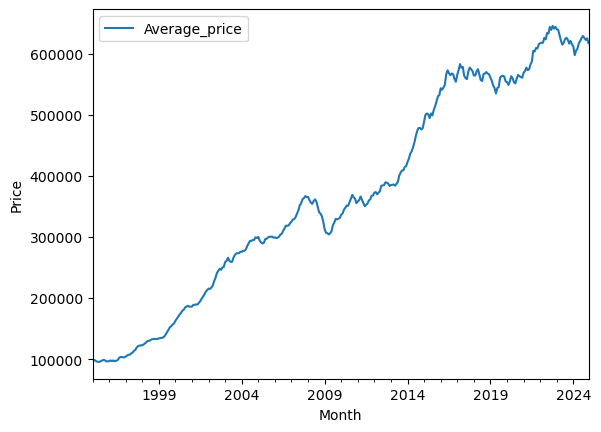

In [53]:
# First of all, make a variable called camden_prices, and assign it the result of filtering df on the following condition:
# df['London_Borough'] == 'Camden'
camden_prices = df[df['London_Borough'] == 'Barnet']

# Make a variable called ax. Assign it the result of calling the plot() method, and plugging in the following values as parameters:
# kind ='line', x = 'Month', y='Average_price'
ax = camden_prices.plot(kind ='line', x = 'Month', y='Average_price')

# Finally, call the set_ylabel() method on ax, and set that label to the string: 'Price'. 
ax.set_ylabel('Price')

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [55]:
df['Year'] =df['Month'].apply(lambda x: x.year)
df.tail()

,London_Borough,ID,Month,Average_price,Year
17260,Sutton,E09000029,2024-12-01 00:00:00,447784.0,2024
17261,Tower Hamlets,E09000030,2024-12-01 00:00:00,510154.0,2024
17262,Waltham Forest,E09000031,2024-12-01 00:00:00,522637.0,2024
17263,Wandsworth,E09000032,2024-12-01 00:00:00,677987.0,2024
17264,Westminster,E09000033,2024-12-01 00:00:00,868377.0,2024


To calculate the mean house price for each year, you first need to **group by** the London_Borough and Year columns.

Make a new variable called *dfg*, and assign it the result of calling the ***groupby()*** method on *df*. Plug in the parameters: by=['Borough', 'Year']. To get the ***mean()*** of the result you'll chain that onto the end. 

We've helped you with this line, it's a little tricky. 

In [64]:
dfg = df.groupby(by=['London_Borough', 'Year'])['Average_price'].mean()
dfg.sample(10)

London_Borough        Year
Hillingdon            2006    237622.833333
Enfield               2002    169714.500000
Westminster           2009    565664.333333
Havering              2011    222722.833333
Redbridge             2009    228636.000000
Kensington & Chelsea  2005    562860.833333
Islington             2011    424381.250000
Harrow                2001    174201.083333
City of London        2015    751095.083333
Haringey              2001    177484.916667
Name: Average_price, dtype: float64

In [60]:
print(dfg)

In [65]:
# Let's reset the index for our new DataFrame dfg, and call the head() method on it. 
# Reset the index of dfg
dfg = dfg.reset_index()

# Display the first few rows of the DataFrame
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,53265.416667
1,Barking & Dagenham,1996,53162.666667
2,Barking & Dagenham,1997,57537.583333
3,Barking & Dagenham,1998,61969.666667
4,Barking & Dagenham,1999,67145.333333


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [74]:
def price_ratio(data):
    price_1998 = float(data['Average_price'][data['Year']==1998])
    price_2018 = float(data['Average_price'][data['Year']==2018])
    ratio      = [price_2018/price_1998]
    return ratio    

In [75]:
#  Test out the function by calling it with the following argument:
# dfg[dfg['London_Borough']=='Barking & Dagenham']
price_ratio(dfg[dfg['London_Borough']=='Barking & Dagenham'])

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14120\3568358748.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price_1998 = float(data['Average_price'][data['Year']==1998])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14120\3568358748.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price_2018 = float(data['Average_price'][data['Year']==2018])


[4.896419753750491]

In [82]:
# We want to do this for all of the London Boroughs. 
# First, let's make an empty dictionary, called final, where we'll store our ratios for each unique London_Borough.
final = {}

In [83]:
# Now let's declare a for loop that will iterate through each of the unique elements of the 'London_Borough' column of our DataFrame dfg.
# Call the iterator variable 'b'. 
for b in dfg['London_Borough'].unique():
    # Let's make our parameter to our create_price_ratio function: i.e., we subset dfg on 'London_Borough' == b. 
    borough = dfg[dfg['London_Borough'] == b]
    # Make a new entry in the final dictionary whose value's the result of calling create_price_ratio with the argument: borough
    final[b] = create_price_ratio(borough)
# We use the function and incorporate that into a new key of the dictionary 
print(final) 

{'Barking & Dagenham': [4.896419753750491], 'Barnet': [4.357781583136056], 'Bexley': [4.249831017882133], 'Brent': [4.895458676582117], 'Bromley': [4.094844535695022], 'Camden': [4.934042636046768], 'City of London': [5.302624411390646], 'Croydon': [4.200990306743318], 'Ealing': [4.311774701171111], 'Enfield': [4.262742326434982], 'Greenwich': [4.763570367287282], 'Hackney': [6.198333689539375], 'Hammersmith & Fulham': [4.138940818546001], 'Haringey': [5.134551273214393], 'Harrow': [4.059150558219601], 'Havering': [4.325868090043559], 'Hillingdon': [4.200285475242334], 'Hounslow': [3.9770769170792564], 'Islington': [4.841875765516273], 'Kensington & Chelsea': [5.0821736365191414], 'Kingston upon Thames': [4.270039865280501], 'Lambeth': [4.958197908650582], 'Lewisham': [5.447926380342587], 'Merton': [4.745154894743145], 'Newham': [5.307659578480389], 'Redbridge': [4.470182934491858], 'Richmond upon Thames': [4.002758912594101], 'Southwark': [5.5163703746415], 'Sutton': [4.11887818309415

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14120\2977171437.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998 = float(d['Average_price'][d['Year']==1998])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14120\2977171437.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2018 = float(d['Average_price'][d['Year']==2018])


Now you have a dictionary with data about the ratio of average prices for each borough between 1998 and 2018, but you can make it prettier by converting it to a DataFrame.

In [84]:
# Make a variable called df_ratios, and assign it the result of calling the DataFrame method on the dictionary final. 
df_ratios = pd.DataFrame(final)

In [85]:
# Call the head() method on this variable to check it out. 
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,4.89642,4.357782,4.249831,4.895459,4.094845,4.934043,5.302624,4.20099,4.311775,4.262742,...,4.745155,5.30766,4.470183,4.002759,5.51637,4.118878,4.626734,5.835128,4.757574,5.352731


In [86]:
# All we need to do now is transpose it, and reset the index! 
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,4.896420
1,Barnet,4.357782
2,Bexley,4.249831
3,Brent,4.895459
4,Bromley,4.094845


In [87]:
# Let's just rename the 'index' column as 'London_Borough', and the '0' column to '2018'.
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,4.896420
1,Barnet,4.357782
2,Bexley,4.249831
3,Brent,4.895459
4,Bromley,4.094845


In [88]:
# Let's sort in descending order and select the top 15 boroughs.
# Make a variable called top15, and assign it the result of calling sort_values() on df_ratios. 
top15 = df_ratios.sort_values(by='2018',ascending=False).head(15)
print(top15)

                 Borough      2018
11               Hackney  6.198334
30        Waltham Forest  5.835128
27             Southwark  5.516370
22              Lewisham  5.447926
32           Westminster  5.352731
24                Newham  5.307660
6         City of London  5.302624
13              Haringey  5.134551
19  Kensington & Chelsea  5.082174
21               Lambeth  4.958198
5                 Camden  4.934043
0     Barking & Dagenham  4.896420
3                  Brent  4.895459
18             Islington  4.841876
10             Greenwich  4.763570


[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Haringey'),
 Text(8, 0, 'Kensington & Chelsea'),
 Text(9, 0, 'Lambeth'),
 Text(10, 0, 'Camden'),
 Text(11, 0, 'Barking & Dagenham'),
 Text(12, 0, 'Brent'),
 Text(13, 0, 'Islington'),
 Text(14, 0, 'Greenwich')]

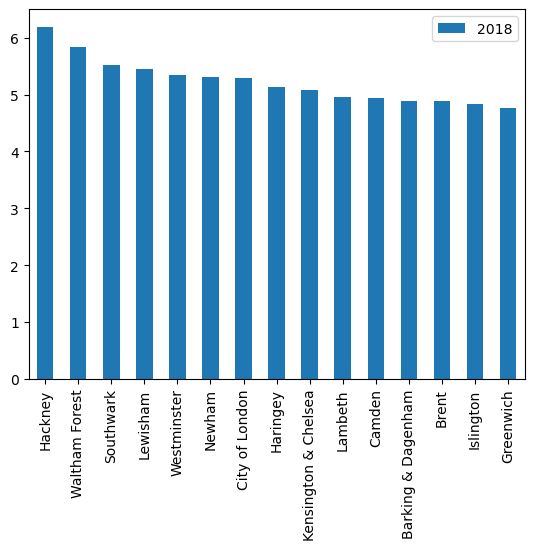

In [89]:
# Let's plot the boroughs that have seen the greatest changes in price.
# Make a variable called ax. Assign it the result of filtering top15 on 'Borough' and '2018', then calling plot(), with
# the parameter kind = 'bar'. 
ax = top15[['Borough','2018']].plot(kind='bar')

ax.set_xticklabels(top15.Borough)

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

#### Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

Answer: Hackney, Waltham Forest and Southwark have had an increase of over 5 times the average price in 2018
since 1998